In [1]:
import pandas as pd
import numpy as np
import umap
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

c:\Users\wrath\source\nasa-crawler\webvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('Downloads/processed_merged.csv', encoding="utf8")
df.Paragraph = df.Paragraph.astype(str)
df

,URL,Lesson_Number,Lesson_Date,Submitting_Organization,Paragraph
0,https://llis.nasa.gov/lesson/1,1,1991-04-09,jsc,prelaunch check shuttle orbiter ov-104 flight ...
1,https://llis.nasa.gov/lesson/1,1,1991-04-09,jsc,recurrence control prevent original manufactur...
2,https://llis.nasa.gov/lesson/1,1,1991-04-09,jsc,ensure process modification considered impleme...
3,https://llis.nasa.gov/lesson/10,10,1991-06-17,jsc,shuttle orbiter general purpose computer ( gpc...
4,https://llis.nasa.gov/lesson/10,10,1991-06-17,jsc,repairing failed component ( gpc iop soldered ...
...,...,...,...,...,...
10917,https://llis.nasa.gov/lesson/998,998,1997-02-01,hq,space shuttle program element contractor prese...
10918,https://llis.nasa.gov/lesson/999,999,1997-02-01,hq,space shuttle safety operational upgrade
10919,https://llis.nasa.gov/lesson/999,999,1997-02-01,hq,nasa plan operate space shuttle least 2012. re...
10920,https://llis.nasa.gov/lesson/999,999,1997-02-01,hq,nasa complete space shuttle upgrade soon possi...


In [3]:
vectorizer = CountVectorizer()
vectorizer.fit(df["Paragraph"].tolist())

print("Vocabulary: ", vectorizer.vocabulary_)

Vocabulary:  {'prelaunch': 11260, 'check': 3161, 'shuttle': 13455, 'orbiter': 10296, 'ov': 10410, '104': 141, 'flight': 6346, 'sts': 14193, '36': 787, 'ac2': 1331, 'bus': 2815, 'phase': 10838, 'voltage': 15916, 'fluctuated': 6386, '112': 176, '122v': 227, 'one': 10219, 'minute': 9382, 'inverter': 8118, 'supplying': 14375, 'removed': 12399, 'replaced': 12448, 'vendor': 15781, 'inspection': 7885, 'failed': 6079, 'found': 6538, 'loose': 8840, 'mounting': 9604, 'screw': 13136, 'electrical': 5382, 'internal': 8038, 'caused': 3012, 'fluctuation': 6388, 'identical': 7466, 'problem': 11394, 'previously': 11342, 'discovered': 4867, 'prompted': 11484, 'change': 3127, 'manufacturing': 9049, 'procedure': 11400, 'include': 7657, 'specified': 13818, 'torque': 14976, 'unit': 15481, 'reworked': 12736, 'procedural': 11398, 'incorporated': 7678, 'rework': 12735, 'process': 11408, 'recurrence': 12155, 'control': 3893, 'prevent': 11333, 'original': 10323, 'defect': 4406, 'expanded': 5910, 'address': 1490,

In [4]:
vector = vectorizer.transform(df["Paragraph"].tolist())
print(vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
def encode_org(x):
    retval = 0

    match x:
        case "jpl":
            retval = 1
        case "ksc":
            retval = 2
        case "msfc":
            retval = 3
        case "jsc":
            retval = 4
        case "gsfc":
            retval = 5
        case "hq":
            retval = 6
        case "grc":
            retval = 7
        case "arc":
            retval = 8
        case "larc":
            retval = 9
        case "nesc":
            retval = 10
        case "afrc":
            retval = 11
        case "wstf":
            retval = 12
        case "ssc":
            retval = 13

    return retval

df_vector = pd.DataFrame(vector.toarray())
dfnew = df.drop(['URL', 'Paragraph'], axis=1)

df_vector.insert(0, "Submitting_Organization", dfnew["Submitting_Organization"])
df_vector.insert(0, "Lesson_Date", dfnew["Lesson_Date"])
df_vector.insert(0, "Lesson_Number", dfnew["Lesson_Number"])

df_vector["Lesson_Date"] = df_vector["Lesson_Date"].str.replace('-', '').astype(int)
df_vector["Submitting_Organization"] = df_vector["Submitting_Organization"].apply(encode_org)
#make sure all column names are strings
df_vector.columns = df_vector.columns.astype(str)

#print(df_vector["Submitting_Organization"].value_counts())

df_vector

,Lesson_Number,Lesson_Date,Submitting_Organization,0,1,2,3,4,5,6,...,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367
0,1,19910409,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,19910409,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,19910409,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,19910617,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,19910617,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10917,998,19970201,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10918,999,19970201,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10919,999,19970201,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10920,999,19970201,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
scaled_data = StandardScaler().fit_transform(df_vector)

In [7]:
reducer_2d = umap.UMAP(n_components=2)
embedding_2d = reducer_2d.fit_transform(scaled_data)
embedding_2d.shape

(10922, 2)

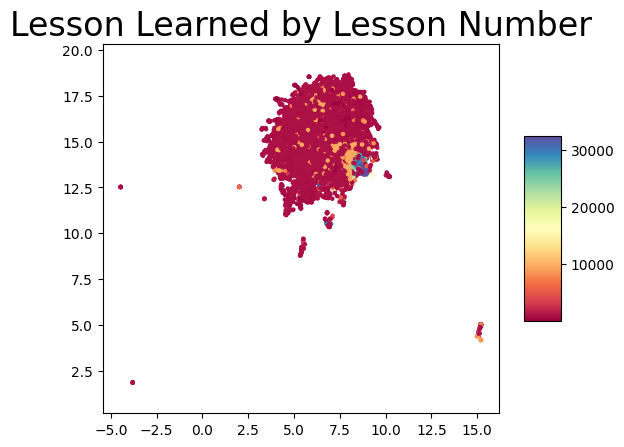

In [8]:
fig = plt.figure()
ax = plt.axes()
sctt = ax.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=df_vector["Lesson_Number"], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.title('Lesson Learned by Lesson Number', fontsize=24)
plt.show()

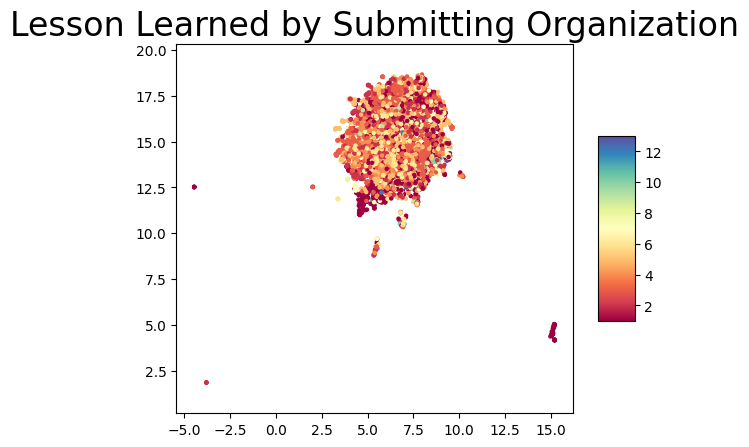

In [9]:
fig = plt.figure()
ax = plt.axes()
sctt = ax.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=df_vector["Submitting_Organization"], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.title('Lesson Learned by Submitting Organization', fontsize=24)
plt.show()

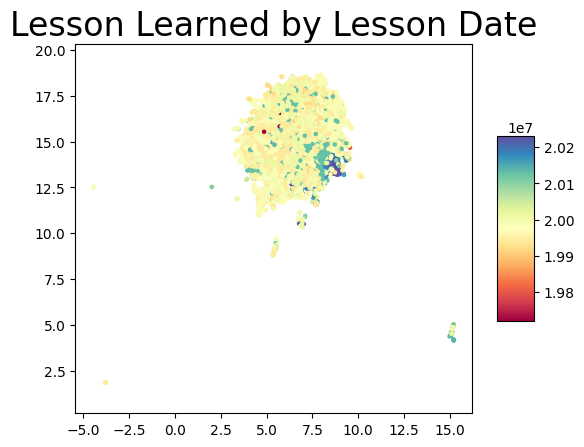

In [10]:
fig = plt.figure()
ax = plt.axes()
sctt = ax.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=df_vector["Lesson_Date"], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.title('Lesson Learned by Lesson Date', fontsize=24)
plt.show()

In [11]:
reducer_3d = umap.UMAP(n_components=3)
embedding_3d = reducer_3d.fit_transform(scaled_data)
embedding_3d.shape

(10922, 3)

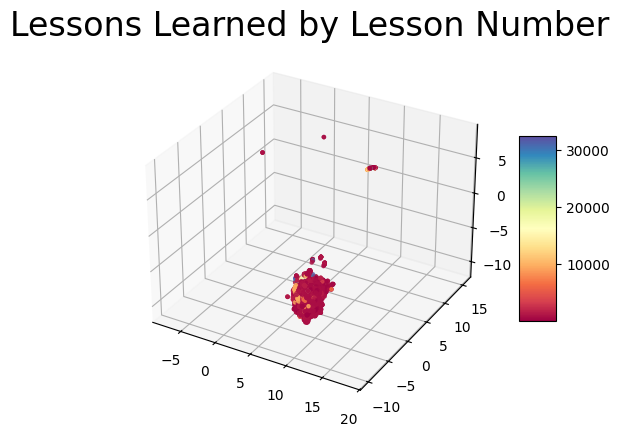

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=df_vector["Lesson_Number"], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.title('Lessons Learned by Lesson Number', fontsize=24)
plt.show()

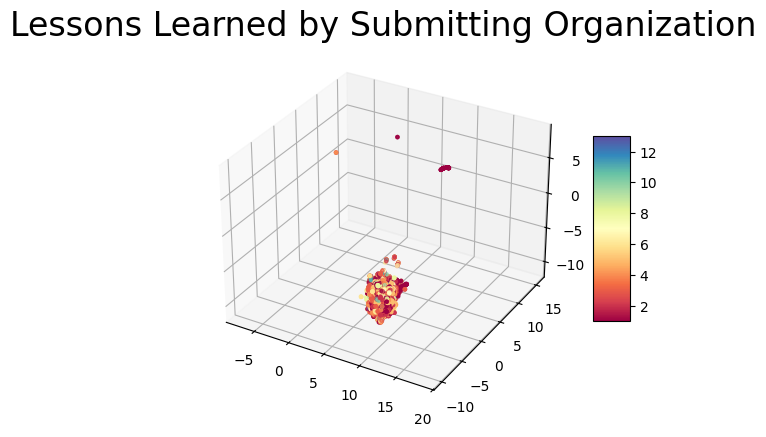

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=df_vector["Submitting_Organization"], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.title('Lessons Learned by Submitting Organization', fontsize=24)
plt.show()

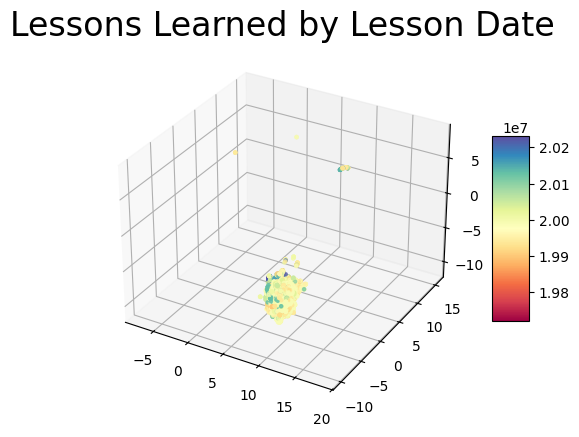

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=df_vector["Lesson_Date"], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.title('Lessons Learned by Lesson Date', fontsize=24)
plt.show()